<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/context_awareness/factual_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Factual Accuracy</h1>

**What is Factual Accuracy?**: Factual accuracy is the degree to which a claim is true. It is crucial in fields like Healthcare, Finance, and Law, where decisions are made based on the accuracy of the information provided. 

For example, the claim "The sky is blue" is factually accurate, while the claim "The sky is green" is not. If LLMs are to be used in a field like Healthcare, it is important to know how accurate the information they provide is. If a patient is diagnosed with a disease, the treatment plan will be based on the accuracy of the diagnosis. If the diagnosis is inaccurate, the treatment plan will be ineffective. This could be the difference between life and death for the patient.

[Read our blog to learn more about factual accuracy and hallucinations in LLMs.](https://blog.uptrain.ai/revealing-the-hidden-truths-the-negative-impacts-of-hallucinations-in-large-language-models-llms/)

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| context | Additional information provided that can be used to answer the question |
| response | The response given by the model |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).
 

## Step 1: Install UpTrain by running 'pip install uptrain'

In [9]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [10]:
cases_with_factually_accurate_data = [
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity."
   },
   {
      "question": "What are the symptoms of a heart attack?",
      "context": "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
      "response": "Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back."
   },
   {
      "question": "Can stress cause physical health problems?",
      "context": "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
      "response": "Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system."
   }
]

cases_with_factually_inaccurate_data = [
    {
        'question': "What causes diabetes?",
        'context': "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
        'response': "Diabetes is caused by eating too much sugar, and reducing sugar intake can cure it completely."
    },
    {
        'question': "What are the symptoms of a heart attack?",
        'context': "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
        'response': "Heart attack symptoms are usually just indigestion and can be relieved with antacids."
    },
    {
        'question': "Can stress cause physical health problems?",
        'context': "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
        'response': "Stress has no impact on physical health; it's just a mental state and doesn't affect the body."
    }
]


data = cases_with_factually_accurate_data + cases_with_factually_inaccurate_data


## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [12]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.FACTUAL_ACCURACY]
)

2024-01-31 17:24:40.201 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [ ]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "score_factual_accuracy": 1.0,
      "explanation_factual_accuracy": "1. Diabetes is primarily caused by a combination of genetic and environmental factors.\nReasoning for yes: The context explicitly states that diabetes is primarily caused by a combination of genetic and environmental factors.\nReasoning for no: No arguments.\nJudgement: yes. as the context explicitly supports the fact.\n\n2. Obesity is a contributing factor to the cause of diabetes.\nReasoning for yes: The context explicitly mentions that obesity is a contributing factor to the cause of diabet

## Step 4: Let's look at some of the results 

### Sample with factually accurate data

In [ ]:
print(json.dumps(res[0],indent=3))

{
   "question": "What causes diabetes?",
   "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "score_factual_accuracy": 1.0,
   "explanation_factual_accuracy": "1. Diabetes is primarily caused by a combination of genetic and environmental factors.\nReasoning for yes: The context explicitly states that diabetes is primarily caused by a combination of genetic and environmental factors.\nReasoning for no: No arguments.\nJudgement: yes. as the context explicitly supports the fact.\n\n2. Obesity is a contributing factor to the cause of diabetes.\nReasoning for yes: The context explicitly mentions that obesity is a contributing factor to the cause of diabetes.\nReasoning for n

### Sample with factually inaccurate data

In [ ]:
print(json.dumps(res[3],indent=3))

{
   "question": "What causes diabetes?",
   "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "response": "Diabetes is caused by eating too much sugar, and reducing sugar intake can cure it completely.",
   "score_factual_accuracy": 0.0,
   "explanation_factual_accuracy": "1. Diabetes is caused by eating too much sugar.\nReasoning for yes: The context explicitly states that diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity. It does not mention that eating too much sugar is the sole cause of diabetes.\nReasoning for no: The context contradicts the fact by stating that diabetes is primarily caused by genetic and environmental factors, not just by eating too much sugar.\nJudgement: no. as the context contradicts the fact.\n\n2. Reducing suga

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [ ]:
from uptrain import Evals, APIClient

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-factual-accuracy-evals", 
    data = data,
    checks = [Evals.FACTUAL_ACCURACY]
)

print(json.dumps(res, indent=3))

2024-01-31 16:20:10.894 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "score_factual_accuracy": 1.0,
      "explanation_factual_accuracy": [
         "1. Diabetes is primarily caused by a combination of genetic and environmental factors.",
         "Reasoning for yes: The context explicitly states that diabetes is primarily caused by a combination of genetic and environmental factors, which includes obesity and lack of physical activity. This supports the given fact sentence. ",
         "Reasoning for no: No arguments.",
         "Judgement: yes. as the context explicitly supports the fact.",
         "2. Obesity is a contributin

In [ ]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "score_factual_accuracy": 1.0,
      "explanation_factual_accuracy": [
         "1. Diabetes is primarily caused by a combination of genetic and environmental factors.",
         "Reasoning for yes: The context explicitly states that diabetes is primarily caused by a combination of genetic and environmental factors, which includes obesity and lack of physical activity. This supports the given fact sentence. ",
         "Reasoning for no: No arguments.",
         "Judgement: yes. as the context explicitly supports the fact.",
         "2. Obesity is a contributin

### Dashboards: 
Histogram of score vs number of cases with that score

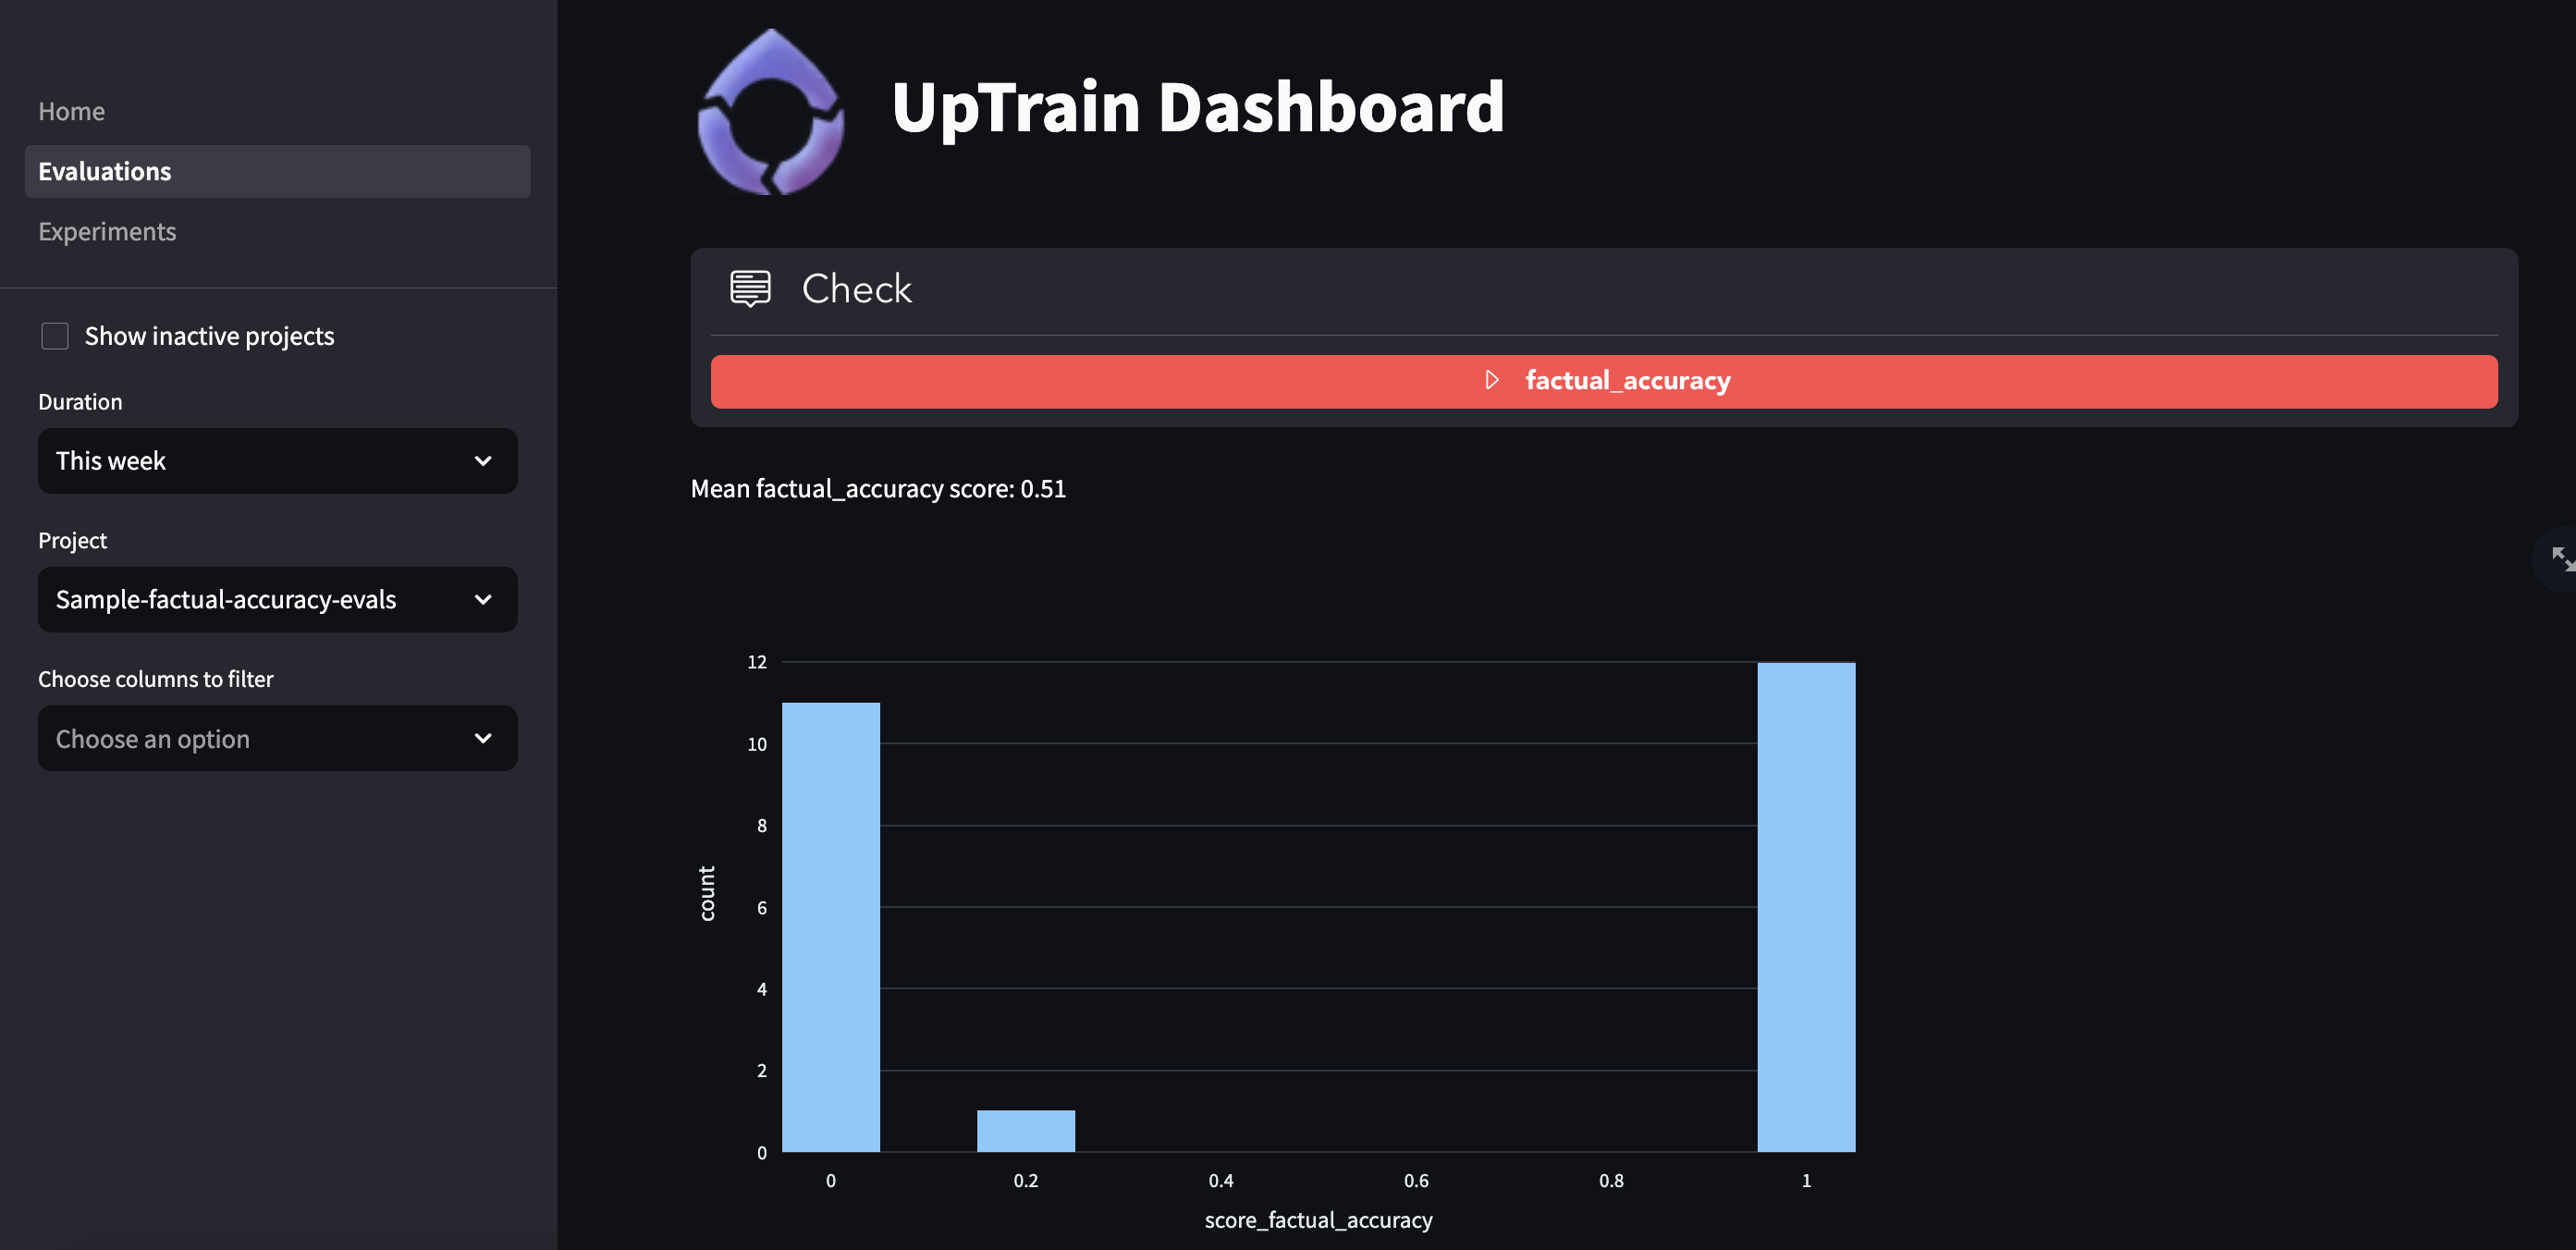

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it!

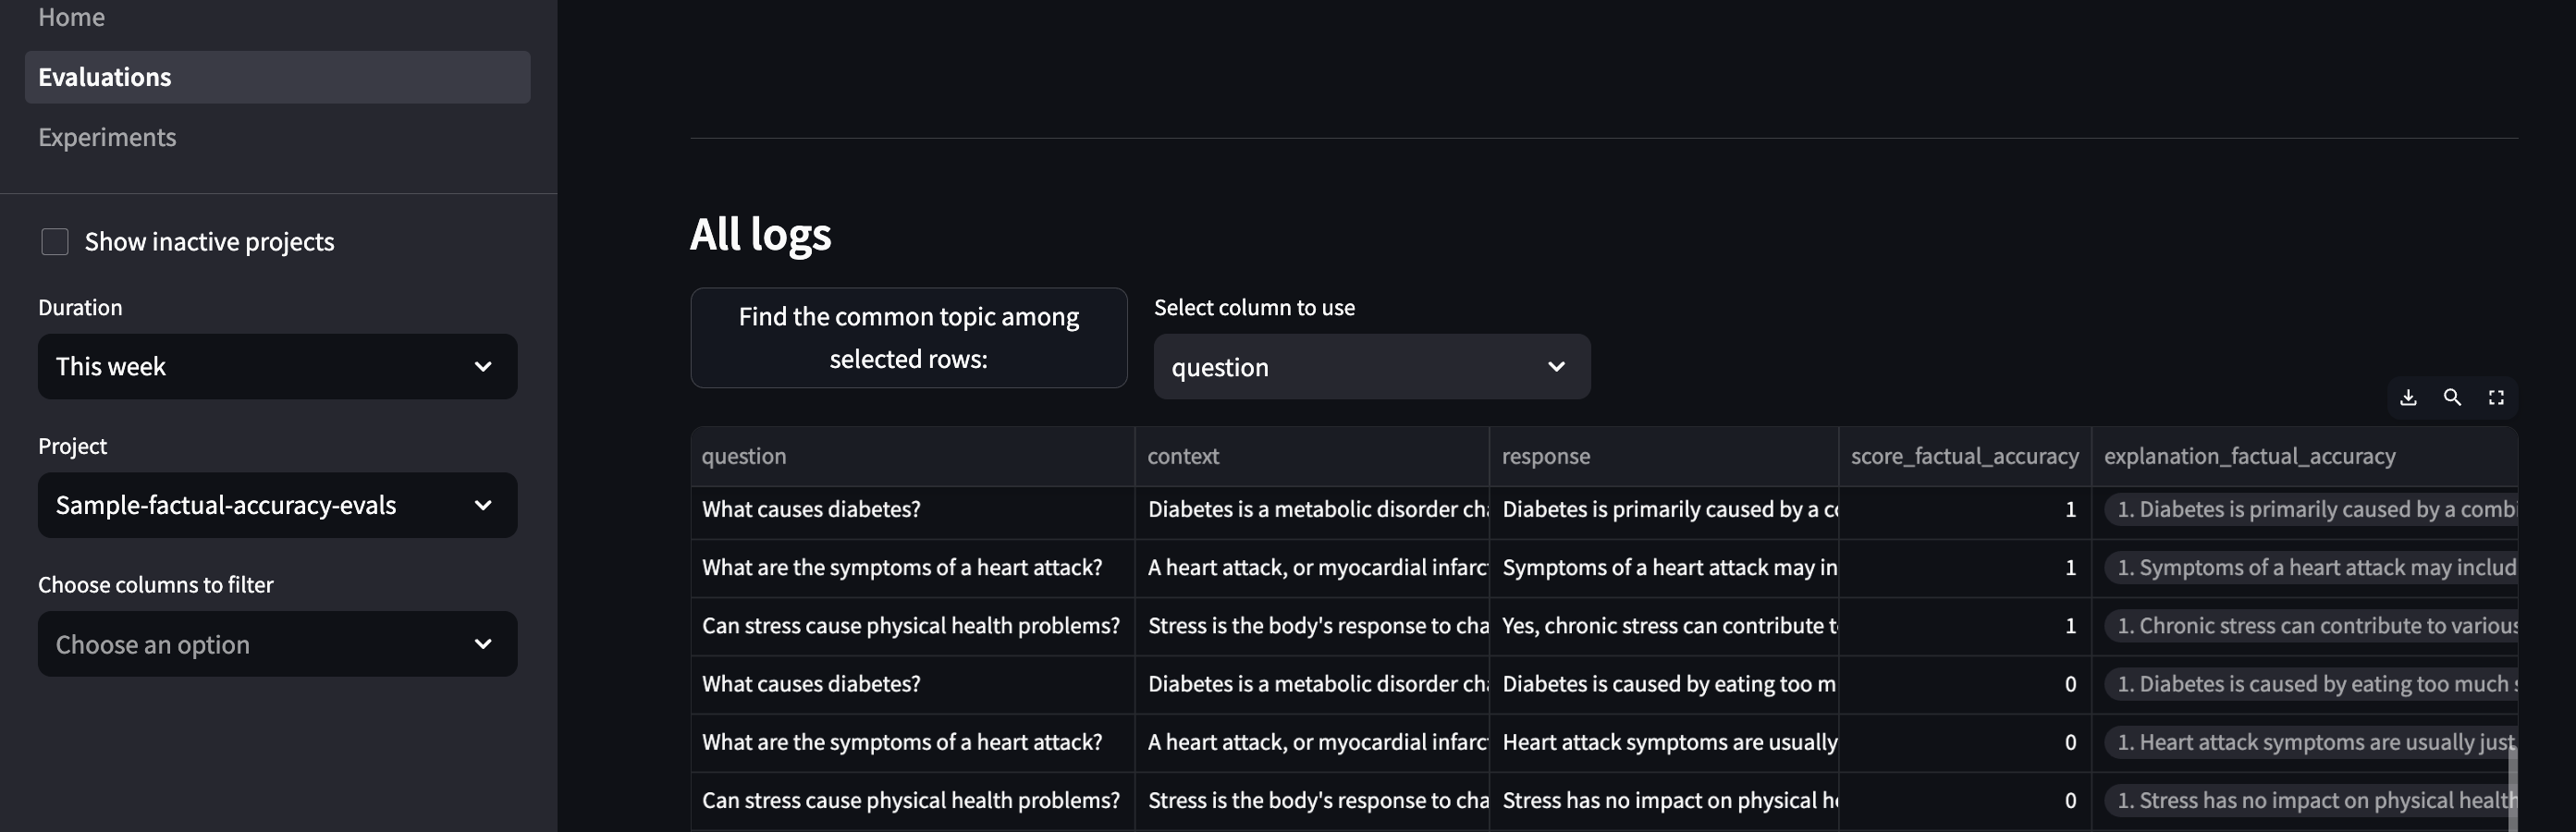